<a href="https://colab.research.google.com/github/Ness731/kgu_bootcamp/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
import numpy as np
train_data = np.array(train_images).reshape(train_images.shape[0],28,28,1)
test_data = np.array(test_images).reshape(test_images.shape[0],28,28,1)
print('Train tensor shape: ',train_data.shape)
print('Test tensor shape: ',test_data.shape)
print('Single image shape:', train_data[0].shape)
print('Train_labels shape:', train_labels.shape)
print('Test_labels shape:', test_labels.shape)

Train tensor shape:  (60000, 28, 28, 1)
Test tensor shape:  (10000, 28, 28, 1)
Single image shape: (28, 28, 1)
Train_labels shape: (60000,)
Test_labels shape: (10000,)


In [5]:
print("max pixel:", train_data.max())
print("max pixel:", train_data.min())

# min max 정규화: X = (x - x_min / (x_max - x_min))
train_norm = train_data / 255.0
test_norm = test_data / 255.0

print("norm max pixel:", train_norm.max())
print("norm max pixel:", train_norm.min())

max pixel: 255
max pixel: 0
norm max pixel: 1.0
norm max pixel: 0.0


In [6]:
X_train = train_norm[10000:]
y_train = train_labels[10000:]

X_valid = train_norm[:10000]
y_valid = train_labels[:10000]

In [34]:
print(X_train.shape)
print(X_valid.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# 랜덤 시드값 설정
tf.random.set_seed(42)

# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="same", activation="relu",
                           input_shape=(28,28,1)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, padding="valid", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, 3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, 3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax") # 출력층 (Classifier), 노드 개수는 10

])

In [26]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 모델 요약 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 5)         50        
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 5)        20        
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        1472      
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)       

In [27]:
history = model.fit(X_train, y_train,
                    epochs=10,batch_size=32,
                    validation_data=(X_valid,y_valid), verbose=1
                    )

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5761 - accuracy: 0.8018 - val_loss: 0.3147 - val_accuracy: 0.8848
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3794 - accuracy: 0.8689 - val_loss: 0.2638 - val_accuracy: 0.9085
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3284 - accuracy: 0.8887 - val_loss: 0.2677 - val_accuracy: 0.9007
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2994 - accuracy: 0.8974 - val_loss: 0.2285 - val_accuracy: 0.9209
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2813 - accuracy: 0.9042 - val_loss: 0.2107 - val_accuracy: 0.9236
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2675 - accuracy: 0.9099 - val_loss: 0.2088 - val_accuracy: 0.9248
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2542 - accuracy: 0.9135 - val_loss: 0.2113 - val_ac

In [28]:
score = model.evaluate(test_norm, test_labels)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.2045 - accuracy: 0.9263
Loss: 0.2045
Accuracy: 0.9263


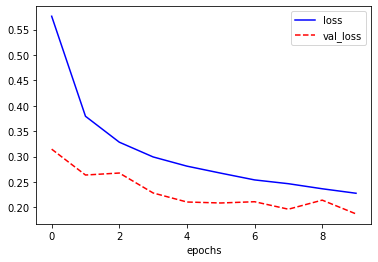

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [30]:
#Make predictions
y_probs = model.predict(test_images)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [31]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

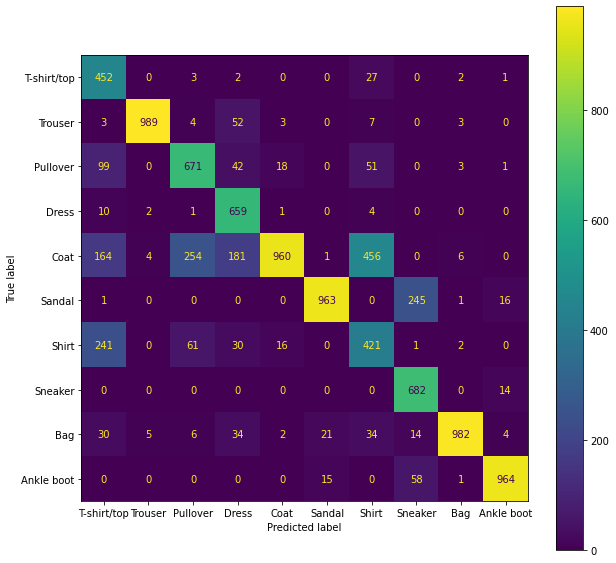

In [32]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
#Confusion matrix
cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);